In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
casos = pd.read_csv(
    './input/caso_full.csv',
    usecols=['city','state','date','new_confirmed']
)
casos = casos.dropna()
casos = casos.drop("city", axis=1)
casos = casos[casos['date'].isin([i for i in casos['date'] if(i[:4] == '2020')])]
casos['date'] = [datetime.strptime(data, '%Y-%m-%d') for data in casos['date']]
casos = casos.reset_index(drop=True)

In [152]:
covid = pd.read_csv(
        './input/INFLUD20-27-03-2023.csv',
        delimiter = ';',
        usecols = ['NU_IDADE_N','EVOLUCAO','CLASSI_FIN','HOSPITAL','DT_INTERNA','SG_UF_INTE','DT_EVOLUCA']
    )
covid = covid[covid['CLASSI_FIN'] == 5]
covid = covid.dropna()
covid = covid.drop("CLASSI_FIN", axis=1)

In [114]:
vacinados = pd.read_csv(
        './input/INFLUD21-27-03-2023.csv',
        delimiter = ';',
        usecols = ['NU_IDADE_N','EVOLUCAO','CLASSI_FIN','HOSPITAL','DT_INTERNA','SG_UF_INTE','DT_EVOLUCA','VACINA_COV']
    )
vacinados = vacinados[vacinados['CLASSI_FIN'] == 5]
vacinados = vacinados.dropna()
vacinados = vacinados.drop("CLASSI_FIN", axis=1)

In [88]:
vacinados.to_csv('./dados/dataSUS_2021_2023.csv', index=False)

In [115]:
def transform_time(covid,coluna,ano):
    tempo = covid[coluna].values
    validos = [i for i in tempo if(i[-4:] in [ano])]
    covid = covid[covid[coluna].isin(validos)]
    covid[coluna] = [datetime.strptime(data, '%d/%m/%Y') for data in covid[coluna]]
    covid = covid.reset_index(drop=True)
    return covid

In [153]:
covid = transform_time(covid,'DT_INTERNA','2020')
covid = transform_time(covid,'DT_EVOLUCA','2020')

/tmp/ipykernel_6350/1900860059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid[coluna] = [datetime.strptime(data, '%d/%m/%Y') for data in covid[coluna]]


In [117]:
vacinados = transform_time(vacinados,'DT_INTERNA','2021')
vacinados = transform_time(vacinados,'DT_EVOLUCA','2021')

/tmp/ipykernel_6350/1900860059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid[coluna] = [datetime.strptime(data, '%d/%m/%Y') for data in covid[coluna]]


In [ ]:
vacinados.to_csv('./dados/dataSUS_2021_2023.csv', index=False)

In [118]:
vacinados = vacinados[vacinados['VACINA_COV'] == 1]

In [119]:
recuperados = vacinados[vacinados['EVOLUCAO'] == 1]
mortos = vacinados[vacinados['EVOLUCAO'] == 2]

In [120]:
recuperados = covid[covid['EVOLUCAO'] == 1]
mortos = covid[covid['EVOLUCAO'] == 2]

In [151]:
def generate_rate(covid,coluna):

    estados = covid['SG_UF_INTE'].unique()
    resultado = []

    for estado in estados:

        covid2 = covid[covid['SG_UF_INTE'] ==estado]
        
        data_min = min(covid2[coluna])

        covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
        covid2 = covid2[covid2['Tempo'] > 0]

        hist = []
        valor = []
        for i in covid2['Tempo'].values:
            if(i in hist):
                valor[hist.index(i)] += 1
            else:
                hist.append(i)
                valor.append(1)
        hist = np.array(hist)
        valor = np.array(valor)

        valor = np.array([i/(k) for i,k in zip(valor,hist)])
        resultado.append([1/np.mean(valor),estado])
    return resultado

In [154]:
resultado = generate_rate(covid,'DT_INTERNA')

/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [155]:
print(np.mean(np.array(resultado).T[0][:-1].astype(float)))
print(resultado)

4.529429558047756
[[0.2083106839209293, 'SP'], [1.31195297734248, 'RS'], [0.5280617372181848, 'RJ'], [1.5896639913824124, 'PR'], [4.100803190105908, 'MA'], [1.5866795502668098, 'PE'], [1.4008667883685915, 'CE'], [2.347004193622202, 'SC'], [1.7901959150604816, 'AM'], [1.169528652828779, 'MG'], [4.461770614401519, 'PB'], [2.3562083232051014, 'PA'], [5.938760644623732, 'RN'], [1.9796902324975985, 'BA'], [6.681826935192632, 'ES'], [2.1303025583724424, 'GO'], [3.907030108208612, 'MT'], [3.4371454045976324, 'DF'], [4.947460402951806, 'AL'], [3.7980071453546764, 'PI'], [15.089713628241366, 'RR'], [11.72915593060568, 'TO'], [8.61999566230216, 'RO'], [11.519302264838908, 'AP'], [5.202515347084259, 'MS'], [9.933215626646756, 'SE'], [27.900424426713588, 'AC']]


In [156]:
resultado = generate_rate(vacinados,'DT_INTERNA')

/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [159]:
print(np.mean(np.array(resultado).T[0].astype(float)))
print(resultado)

19.357966664814178
[[6.903033454276661, 'BA'], [16.110729036668403, 'PA'], [1.5502679213923556, 'MG'], [0.5390251433081051, 'SP'], [2.21323656544011, 'RS'], [12.390515711185156, 'MT'], [10.392773495546876, 'PE'], [2.8324901242493326, 'PR'], [34.36742313558378, 'TO'], [2.3696173301925967, 'RJ'], [6.932863772850178, 'DF'], [9.736476306677119, 'CE'], [20.08620587323562, 'PI'], [5.922976620646305, 'GO'], [6.972706949077186, 'MS'], [14.270270704063561, 'PB'], [16.509443695739055, 'AL'], [6.04413129766864, 'SC'], [20.455864046992296, 'RN'], [30.550688603067332, 'ES'], [25.386052861607883, 'AC'], [21.13055668743911, 'SE'], [28.800345290227728, 'AM'], [23.37471013502319, 'MA'], [65.4109981836544, 'RO'], [57.14962228409909, 'RR'], [74.26207472007071, 'AP']]


,NU_IDADE_N,HOSPITAL,DT_INTERNA,SG_UF_INTE,EVOLUCAO,DT_EVOLUCA,VACINA_COV
0,46,1.0,2021-01-04,BA,1.0,2021-01-20,1.0
4,77,1.0,2021-01-11,PA,1.0,2021-01-15,1.0
6,73,1.0,2021-01-11,MG,1.0,2021-01-17,1.0
11,70,1.0,2021-01-12,SP,1.0,2021-01-24,1.0
14,84,1.0,2021-02-17,MG,1.0,2021-03-03,1.0
...,...,...,...,...,...,...,...
774423,49,1.0,2021-12-08,RS,1.0,2021-12-16,1.0
774426,22,1.0,2021-12-28,RJ,1.0,2021-12-31,1.0
774428,61,1.0,2021-04-01,PR,2.0,2021-04-06,1.0
774430,68,1.0,2021-05-04,SP,1.0,2021-05-09,1.0


In [95]:
np.mean(np.array(resultado).T[0].astype(float))

5.3950219605909355

In [79]:
resultado

[[0.2083106839209293, 'SP'],
 [1.31195297734248, 'RS'],
 [0.5280617372181848, 'RJ'],
 [1.5896639913824124, 'PR'],
 [4.100803190105908, 'MA'],
 [1.5866795502668098, 'PE'],
 [1.4008667883685915, 'CE'],
 [2.347004193622202, 'SC'],
 [1.7901959150604816, 'AM'],
 [1.169528652828779, 'MG'],
 [4.461770614401519, 'PB'],
 [2.3562083232051014, 'PA'],
 [5.938760644623732, 'RN'],
 [1.9796902324975985, 'BA'],
 [6.681826935192632, 'ES'],
 [2.1303025583724424, 'GO'],
 [3.907030108208612, 'MT'],
 [3.4371454045976324, 'DF'],
 [4.947460402951806, 'AL'],
 [3.7980071453546764, 'PI'],
 [15.089713628241366, 'RR'],
 [11.72915593060568, 'TO'],
 [8.61999566230216, 'RO'],
 [11.519302264838908, 'AP'],
 [5.202515347084259, 'MS'],
 [9.933215626646756, 'SE'],
 [27.900424426713588, 'AC']]

In [100]:
resultado = generate_rate(recuperados,'DT_EVOLUCA')

/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [101]:
np.mean(np.array(resultado).T[0].astype(float))

24.20886988346322

In [111]:
max(vacinados['DT_INTERNA'].tolist())

Timestamp('2023-01-03 00:00:00')

In [102]:
resultado

[[10.474381839812333, 'BA'],
 [25.639425689456544, 'PA'],
 [2.8104281166380254, 'MG'],
 [1.0664050633774096, 'SP'],
 [4.399004299815108, 'RS'],
 [20.150320560041244, 'MT'],
 [20.09870967622912, 'PE'],
 [5.352324916833242, 'PR'],
 [26.621216693980053, 'TO'],
 [10.809408501003052, 'DF'],
 [15.057889638790572, 'CE'],
 [5.032369477023687, 'RJ'],
 [10.278479027721216, 'GO'],
 [22.215201491491875, 'AL'],
 [21.856156666593982, 'PI'],
 [10.221282422851564, 'SC'],
 [36.44441770592882, 'ES'],
 [10.217941080587353, 'MS'],
 [24.927819406980618, 'PB'],
 [27.168953862290948, 'MA'],
 [74.06525800606379, 'RO'],
 [31.087836898693908, 'AM'],
 [32.63671315872133, 'RN'],
 [51.830769956852976, 'SE'],
 [96.50144638412579, 'AP'],
 [37.88531078011552, 'RR'],
 [18.790015531486855, 'AC']]

In [103]:
resultado = generate_rate(mortos,'DT_EVOLUCA')

/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2['Tempo'] =  np.array([(data - data_min).days for data in covid2[coluna].values])
/tmp/ipykernel_6350/607319133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [104]:
np.mean(np.array(resultado).T[0].astype(float))

36.93769799531997

In [105]:
resultado

[[6.715021762102341, 'RJ'],
 [5.16337260912024, 'RS'],
 [8.508816412330539, 'PR'],
 [23.5977316266412, 'PE'],
 [41.2929508431813, 'PI'],
 [5.253668344579204, 'MG'],
 [2.7579614663383074, 'SP'],
 [18.058909824303687, 'MS'],
 [20.764889138551666, 'BA'],
 [18.9543928576321, 'PB'],
 [30.018406353784982, 'DF'],
 [13.16558179620069, 'SC'],
 [28.062603474090935, 'RN'],
 [23.347007221374955, 'AC'],
 [23.829123511707724, 'SE'],
 [15.230662503325465, 'GO'],
 [43.472673675995864, 'MT'],
 [74.18688888897832, 'AM'],
 [67.3770525158157, 'MA'],
 [22.381714449851, 'CE'],
 [41.72021333277253, 'PA'],
 [60.26090105634327, 'ES'],
 [57.28976157748525, 'AL'],
 [85.11277407053535, 'TO'],
 [109.34204437648182, 'RR'],
 [78.77164210920645, 'RO'],
 [72.68108007490828, 'AP']]

In [152]:
def slice2020(df):
    tempo = [i for i in df['Data'].values if(i[-4:] == '2020')]
    df = df[df['Data'].isin(tempo)]
    mes = [i[3:6] for i in df['Data'].values]
    hist = []
    data = []
    c = 2
    for i in mes:
        if(i in hist):
            continue
        else:
            hist.append(i)
            if(c >=10):
                data.append(f'{c}')
            else:
                data.append(f'0{c}')
            c += 1
    print(hist,data)
    tempo = [i.replace(i[3:6],data[hist.index(i[3:6])]) for i in tempo]
    datas_dt = [datetime.strptime(data, '%d/%m/%Y') for data in tempo]
    df['Data'] = datas_dt
    return df

In [168]:
df = pd.read_csv(
        './input/Dados-covid-19-estado.csv',
        encoding='ISO-8859-1',
        delimiter= ';',
        usecols= ['Data','Casos','Casos por dia','Óbitos por dia']
    )
df = slice2020(df)

['fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'] ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


/tmp/ipykernel_11772/3596836534.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = datas_dt


In [114]:
covid.to_csv('./input/dataSUS_2020.csv', index=False)

In [341]:
(np.sum(total)/(np.max(hist)))

0.917799606649301

In [282]:
total

array([4.64615385, 2.07894737, 2.21578947, 2.1       , 6.53846154,
       1.70909091, 2.6984127 , 1.06395349, 1.59210526, 0.6635514 ,
       0.85645933, 2.36363636, 0.55839416, 6.58333333, 8.64444444,
       8.06060606, 2.52631579, 0.91809524, 2.21311475, 0.40643275,
       0.95588235, 1.80497925, 0.30382775, 1.05357143, 0.51813472,
       1.1769437 , 0.7552795 , 0.42735043, 0.36292223, 1.49149338,
       1.72413793, 0.88      , 0.92123769, 1.88498403, 0.44429348,
       0.29889807, 0.86198547, 0.33688699, 0.32047244, 0.82670744,
       1.99759036, 0.89875   , 0.44533762, 0.36466698, 0.36433735,
       0.22868421, 1.41630277, 0.39327024, 0.26423867, 0.45107399,
       1.17056856, 0.214565  , 3.39130435, 0.29131389, 0.25606868,
       0.48034934, 0.65748709, 0.70667957, 1.39112344, 0.25439959,
       0.29447415, 0.5906801 , 0.23406564, 0.35472858, 0.67034991,
       0.68237705, 0.25257732, 0.27553376, 0.2985133 , 0.3339719 ,
       0.13538076, 0.13744821, 0.62265332, 0.16887232, 0.15550

In [138]:
tempo = [i for i in tempo if(i!=0)]

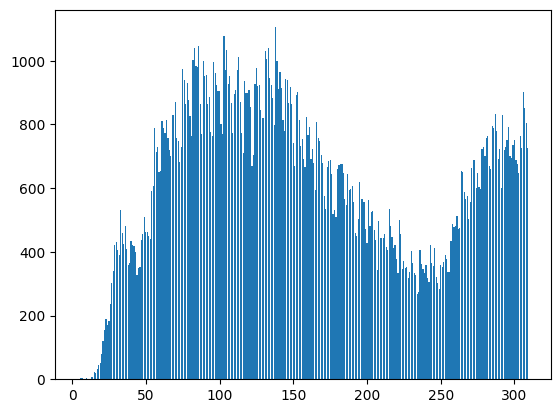

In [141]:
sorting = np.argsort(hist)
valor = valor[sorting]
hist = hist[sorting]

In [143]:
1/(np.sum(valor[hist<315])/315/1462297)

2479.710347389331

In [72]:
hist

array([   4,    5,   10,   12,   13,   14,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,
         54,   55,   56,   57,   58,   59,   60,   61,   62,   63,   64,
         65,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,
         76,   77,   78,   79,   80,   81,   82,   83,   84,   85,   86,
         87,   88,   89,   90,   91,   92,   93,   94,   95,   96,   97,
         98,   99,  100,  101,  102,  103,  104,  105,  106,  107,  108,
        109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,
        120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,
        131,  132,  133,  134,  135,  136,  137,  138,  139,  140,  141,
        142,  143,  144,  145,  146,  147,  148,  149,  150,  151,  152,
        153,  154,  155,  156,  157,  158,  159,  1

In [69]:
s

[0,
 3038,
 3751,
 3775,
 3777,
 3799,
 3802,
 3803,
 3813,
 3821,
 3821,
 3824,
 3825,
 3825,
 3826,
 3826,
 3826,
 3826,
 3827,
 3827,
 3827,
 3828,
 3828,
 3829,
 3829,
 3829,
 3829,
 3830,
 3830,
 3831,
 3831,
 3831,
 3832,
 3832,
 3832,
 3832,
 3832,
 3833,
 3833,
 3833,
 3833,
 3833,
 3833,
 3834,
 3834,
 3834,
 3834,
 3834,
 3834,
 3835,
 3835,
 3835,
 3835,
 3835,
 3835,
 3836,
 3836,
 3836,
 3836,
 3836,
 3836,
 3836,
 3836,
 3837,
 3837,
 3837,
 3837,
 3837,
 3837,
 3838,
 3838,
 3838,
 3838,
 3838,
 3838,
 3838,
 3838,
 3839,
 3839,
 3839,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3840,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3841,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3842,
 3